# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
# Your code here
df = pd.read_csv('data_all.zip', nrows=75000)

In [8]:
df.head(20)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.dtypes

e      float64
1      float64
2      float64
3      float64
4      float64
        ...   
780    float64
781    float64
782    float64
783    float64
784    float64
Length: 785, dtype: object

In [12]:
# Your code here
data=df.values 

print ('Dimensiones de la matriz de datos: {}'.format(data.shape))


Dimensiones de la matriz de datos: (75000, 785)


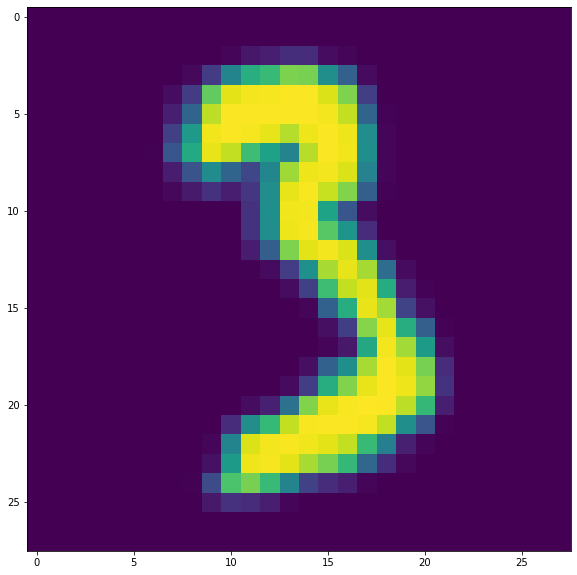

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(data[19,1:].reshape(28,28))  
plt.show()

In [16]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [17]:
upper=df.loc[(df.e>=10) & (df.e<36)]
upper.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
upper_data=upper.values
upper_data.shape


(20136, 785)

In [19]:
X=upper_data[:,1:]/255 #del RedGreenBlue, entre 255 para normalizar..

In [20]:
y=upper_data[:,0]

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(16108, 784)

In [22]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=5).fit(X_train, y_train)

In [27]:
def resumen(datos, modelo):
    for e in datos:
        nombre, etiqueta, Xs=e
        etiq=etiqueta.size
        
        y_pred=modelo.predict(Xs)
        
        cuenta=0
        for muestra in range(etiq):
            if y_pred[muestra]==etiqueta[muestra]:         
                cuenta+=1
        
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

In [28]:
resumen([('Entrenamiento  :', y_train, X_train)], rf)
resumen([('Test  :', y_test, X_test)], rf)


Entrenamiento  :
10457 correctos de 16108 ==> 64.92% correcto

Test  :
2509 correctos de 4028 ==> 62.29% correcto


In [24]:
classification_report(y_test, rf.predict(X_test))

/Users/enrique/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n        10.0       0.57      0.61      0.59       142\n        11.0       0.00      0.00      0.00        81\n        12.0       0.59      0.84      0.70       240\n        13.0       1.00      0.01      0.02        86\n        14.0       0.92      0.18      0.30       124\n        15.0       0.68      0.46      0.55       205\n        16.0       0.00      0.00      0.00        54\n        17.0       0.00      0.00      0.00        67\n        18.0       0.49      0.89      0.63       256\n        19.0       0.00      0.00      0.00        69\n        20.0       0.00      0.00      0.00        56\n        21.0       0.82      0.26      0.40       106\n        22.0       0.77      0.91      0.84       185\n        23.0       0.58      0.71      0.64       178\n        24.0       0.65      0.96      0.77       532\n        25.0       0.63      0.77      0.69       187\n        26.0       0.00      0.00      0.00        63\n       

+Try to do the same thing with lowercases.

In [40]:
lower=df.loc[df.e>35]
lower.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
lower_data=lower.values
lower_data.shape

(17400, 785)

In [31]:
X=lower_data[:,1:]/255

In [32]:
y=lower_data[:,0]

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(13920, 784)

In [34]:
svc=SVC(gamma='auto').fit(X_train, y_train)

In [35]:
resumen([('Entrenamiento  :', y_train, X_train)], svc)
resumen([('Test  :', y_test, X_test)], svc)


Entrenamiento  :
11454 correctos de 13920 ==> 82.28% correcto

Test  :
2853 correctos de 3480 ==> 81.98% correcto


In [ ]:
# Your code here
lower=df.loc[df.e>35]
lower.head()

In [ ]:
lower_data=lower.values
lower_data.shape


In [38]:
resumen([('Entranamiento  :', y_train, X_train)], svc)
resumen([('Test  :', y_test, X_test)], svc)


Entranamiento  :
11454 correctos de 13920 ==> 82.28% correcto

Test  :
2853 correctos de 3480 ==> 81.98% correcto


In [36]:
classification_report(y_test, svc.predict(X_test))

'              precision    recall  f1-score   support\n\n        36.0       0.78      0.85      0.81       224\n        37.0       0.87      0.85      0.86        96\n        38.0       0.81      0.51      0.63        51\n        39.0       0.86      0.93      0.89       246\n        40.0       0.89      0.96      0.92       493\n        41.0       0.90      0.61      0.73        61\n        42.0       0.57      0.59      0.58        73\n        43.0       0.80      0.88      0.84       216\n        44.0       1.00      0.02      0.03        63\n        45.0       0.77      0.57      0.66        42\n        46.0       0.78      0.47      0.59        62\n        47.0       0.75      0.96      0.84       352\n        48.0       0.88      0.81      0.84        53\n        49.0       0.85      0.91      0.88       241\n        50.0       0.87      0.79      0.83        61\n        51.0       0.90      0.63      0.74        41\n        52.0       0.68      0.44      0.53        62\n       

In [43]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb=GNB()

gnb.fit(X_train, y_train)

train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)

print ('Entrenamiento Acc:',train_score, '\n Testeo Acc:', test_score)

Entrenamiento Acc: 0.3683908045977011 
 Testeo Acc: 0.3635057471264368


In [44]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()

mnb.fit(X_train, y_train)

train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)

print ('train Acc:',train_score, '\n test Acc:', test_score)

train Acc: 0.6653735632183908 
 test Acc: 0.6724137931034483


In [47]:
mnb


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

* Try to do the same thing with numbers.

In [41]:
# Your code here
number=df.loc[df.e<10]
number.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Your code here
number_data=number.values
number_data.shape


(37464, 785)

In [49]:
X=number_data[:,1:]/255
y=number_data[:,0]


In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(29971, 784)

In [51]:
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)


/Users/enrique/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [52]:

resumen([('Entranamiento  :', y_train, X_train)], logreg)
resumen([('Test  :', y_test, X_test)], logreg)



Entranamiento  :
27949 correctos de 29971 ==> 93.25% correcto

Test  :
7005 correctos de 7493 ==> 93.49% correcto


In [53]:
classification_report(y_test, logreg.predict(X_test))


'              precision    recall  f1-score   support\n\n         0.0       0.96      0.96      0.96       747\n         1.0       0.95      0.98      0.96       804\n         2.0       0.95      0.93      0.94       741\n         3.0       0.92      0.92      0.92       759\n         4.0       0.92      0.93      0.92       725\n         5.0       0.88      0.88      0.88       615\n         6.0       0.96      0.97      0.96       733\n         7.0       0.95      0.96      0.96       837\n         8.0       0.93      0.88      0.90       747\n         9.0       0.91      0.93      0.92       785\n\n    accuracy                           0.93      7493\n   macro avg       0.93      0.93      0.93      7493\nweighted avg       0.93      0.93      0.93      7493\n'

####mejoró muchísimo con la regresión logística
